In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load and prepare Titanic data
titanic_train = pd.read_csv(r"C:\Users\simra\Downloads\train.csv")    # Read the data

# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train=titanic_train[["Survived","Pclass","Sex","Age","Fare"]]
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [8]:
#Label Encoding Categorical Data

In [9]:
lb_l=LabelEncoder()
titanic_train_ldl=titanic_train.copy()
titanic_train_ldl['Sex']=lb_l.fit_transform(titanic_train_ldl['Sex'])
titanic_train_ldl.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [11]:
from sklearn import tree
from sklearn import preprocessing

In [12]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = titanic_train["Survived"])

DecisionTreeClassifier()

In [13]:
#Filling Empty Columns for Data Consistency

In [14]:
titanic_train_ldl.Age.fillna(titanic_train_ldl.Age.mean(),inplace=True)
titanic_train_ldl.Age=titanic_train_ldl.Age.apply(lambda x:round(x))
titanic_train_ldl.drop(index=803,inplace=True)

In [15]:
#Gender Vs Survived

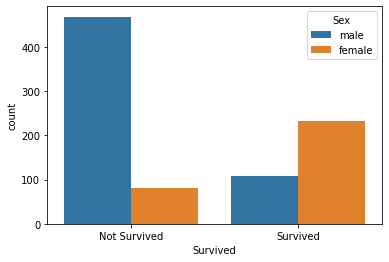

In [17]:
sns.countplot(x='Survived',data=titanic_train,hue = 'Sex')
plt.xticks([0,1],["Not Survived","Survived"])
plt.show()

In [18]:
#Pclass vs Survived

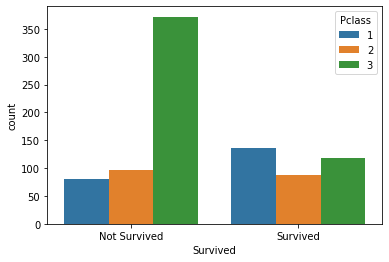

In [19]:
sns.countplot(x='Survived',data=titanic_train,hue = 'Pclass')
plt.xticks([0,1],["Not Survived","Survived"])
plt.show()

In [20]:
#Correlation Matrix Between Features

Text(0.5, 1.0, 'Correlation matrix')

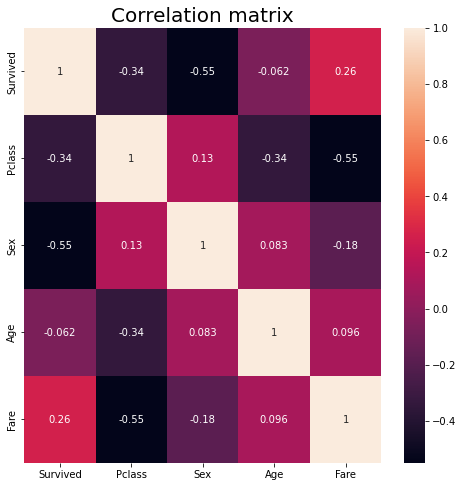

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(titanic_train_ldl.corr(),annot=True)
plt.title("Correlation matrix",fontdict={"size":20})

In [23]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [28]:
# Get survival probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], titanic_train["Sex"])

Sex,female,male
row_0,,
0.257962,314,0
0.811092,0,577


In [29]:
# Make data frame of predictors
predictors = pd.DataFrame([encoded_sex, titanic_train["Pclass"]]).T

# Train the model
tree_model.fit(X = predictors, 
               y = titanic_train["Survived"])

DecisionTreeClassifier()

In [30]:
#Target Variable

Y=titanic_train_ldl.Survived
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
#Features

X=titanic_train_ldl.drop(columns=["Survived"])
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22,7.2500
1,1,0,38,71.2833
2,3,0,26,7.9250
3,1,0,35,53.1000
4,3,1,35,8.0500


In [32]:
#Standardizing Data

mn=MinMaxScaler()
X[['Age','Fare']]=mn.fit_transform(X[['Age','Fare']])
X.head()

,Pclass,Sex,Age,Fare
0,3,1,0.265823,0.014151
1,1,0,0.468354,0.139136
2,3,0,0.316456,0.015469
3,1,0,0.430380,0.103644
4,3,1,0.430380,0.015713


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [34]:
X_train.shape

(712, 4)

In [35]:
y_train.shape

(712,)

In [36]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [39]:
#DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Visualizing Decision Tree Using Graphiz

from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pylab as pylab
# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=X.columns,  
                          class_names=["Not Survived","Survived"],  
                          ) 
graph = graphviz.Source(dot_data) 
filename = graph.render(filename='img/DesecionTree')
pylab.savefig("filename.png")

In [42]:
predict=model.predict(X_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
print("Accuracy score: ",accuracy_score(y_test,predict))

Accuracy score:  0.7865168539325843


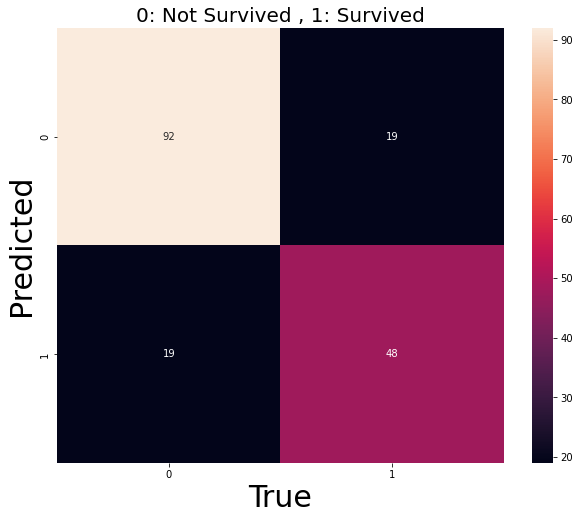

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.xlabel("True",fontdict={"size":"30"})
plt.ylabel("Predicted",fontdict={"size":"30"})
plt.title("0: Not Survived , 1: Survived",fontdict={"size":20})
plt.show()

In [46]:
# Get survival probability
preds = tree_model.predict_proba(X = predictors)

# Create a table of predictions by sex and class
pd.crosstab(preds[:,0], columns = [titanic_train["Pclass"], 
                                   titanic_train["Sex"]])

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

In [47]:
predictors = pd.DataFrame([encoded_sex,
                           titanic_train["Pclass"],
                           titanic_train["Age"],
                           titanic_train["Fare"]]).T

# Initialize model with maximum tree depth set to 8
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

tree_model.fit(X = predictors, 
               y = titanic_train["Survived"])

DecisionTreeClassifier(max_depth=8)

In [ ]:
# Save tree as dot file
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [49]:
tree_model.score(X = predictors, 
                 y = titanic_train["Survived"])

0.8911335578002245

In [50]:
# Read and prepare test data
titanic_test = pd.read_csv(r"C:\Users\simra\Downloads\train.csv")    # Read the data

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_test["Age"])      # Value if check is false

new_fare_var = np.where(titanic_test["Fare"].isnull(), # Logical check
                       50,                       # Value if check is true
                       titanic_test["Fare"])      # Value if check is false

titanic_test["Age"] = new_age_var 
titanic_test["Fare"] = new_fare_var

In [51]:
# Convert test variables to match model features
encoded_sex_test = label_encoder.fit_transform(titanic_test["Sex"])

test_features = pd.DataFrame([encoded_sex_test,
                              titanic_test["Pclass"],
                              titanic_test["Age"],
                              titanic_test["Fare"]]).T

In [52]:
# Make test set predictions
test_preds = tree_model.predict(X=test_features)

# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Save submission to CSV
submission.to_csv("tutorial_dectree_submission.csv", 
                  index=False)        # Do not save index values

In [53]:
#Holdout Validation and Cross Validation

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
v_train, v_test = train_test_split(titanic_train,     # Data set to split
                                   test_size = 0.25,  # Split ratio
                                   random_state=1,    # Set random seed
                                   stratify = titanic_train["Survived"]) #*

# Training set size for validation
print(v_train.shape)
# Test set size for validation
print(v_test.shape)

(668, 5)
(223, 5)


In [60]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=12)
kf.get_n_splits(titanic_train)



10

In [61]:
fold_accuracy = []

titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in kf.split(titanic_train):
    train = titanic_train.loc[train_fold] # Extract train data with cv indices
    valid = titanic_train.loc[valid_fold] # Extract valid data with cv indices
    
    model = tree_model.fit(X = train[["Sex","Pclass","Age","Fare"]], 
                           y = train["Survived"])
    valid_acc = model.score(X = valid[["Sex","Pclass","Age","Fare"]], 
                            y = valid["Survived"])
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.8222222222222222, 0.7415730337078652, 0.8426966292134831, 0.7752808988764045, 0.8089887640449438, 0.9325842696629213, 0.8202247191011236, 0.8314606741573034, 0.8539325842696629, 0.8314606741573034] 

Average accuracy:  0.8260424469413234


In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
scores = cross_val_score(estimator= tree_model,     # Model to test
                X= titanic_train[["Sex","Pclass",   # Train Data
                                  "Age","Fare"]],  
                y = titanic_train["Survived"],      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.74444444 0.82022472 0.75280899 0.85393258 0.87640449 0.79775281
 0.83146067 0.76404494 0.85393258 0.84269663]
Average accuracy:  0.8137702871410737
